Credit Crad Fraud Detecion Model :building a model that ty to detect if the transcution is fraud or not.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###imprort libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML-Datasets/creditcard.csv')

In [4]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail

<bound method NDFrame.tail of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

###Data Explortion



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# its dimensions:
df.shape

(284807, 31)

In [8]:
print('the number of NAN values:')
df.isna().sum()


the number of NAN values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.isna().sum().sum()


0

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [12]:
print('the number of duplicates = ')
df.duplicated().sum()

the number of duplicates = 


1081

In [13]:
df.drop_duplicates( inplace=True)

In [14]:
df.shape

(283726, 31)

In [15]:
#is the dataset balanced?
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

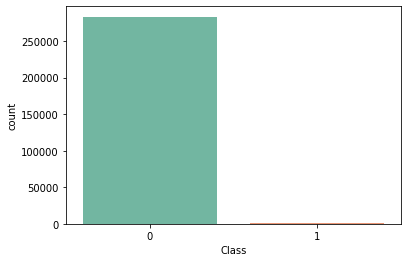

In [16]:
sns.countplot(x='Class', data=df, palette='Set2')
plt.show()

###Separing the dataset (data,target)

In [17]:
y=df['Class']

In [18]:
x=df.copy()

In [19]:
x.drop(['Class'],inplace=True,axis=1)

In [20]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


###Data is highly unbalanced :

0 --> Normal Transaction

1 --> fraudulent transaction

###Some Exploration for each categoty (Fraud ,Legit)

In [21]:
# separating the fraud and legit detection for  analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [22]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [23]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


###Dealing with the unbalanced dataset :

Method 1) Under Sampling.

Method 2)  Over Sapmling.

**In our case** ,we will use a combination from oversampling and 
under sampling as follows :

*   Oversampling the minorclass (fraud Transcion) 
*   Undersampling the majority class to minority class new level




**Goal** is to Build a sample dataset containing sufficient and balanced distribution of  

1.   Ligit transcution
2.   Fraud Transucion 

normal transactions and Fraudulent Transactions

**before sampling the data we will split it such that the test data will be the original one not one oversampled **


In [26]:
x, X_test,y, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101, shuffle=True)

In [27]:
##to be used to resample the data

Undersample=RandomUnderSampler(sampling_strategy=1.0)
oversample = SMOTE(sampling_strategy=.7, random_state=42)  ##using smote making the minority class .2 from majority class

**Undersampling the data**

In [28]:

X_uder_sampled, y_undersampled = Undersample.fit_resample(x,y)

###Now ,After Under sampling : ### 


In [29]:
reasmpled_data=pd.concat([X_uder_sampled,y_undersampled], axis=1)   ##concainating the data and the target

In [30]:
reasmpled_test=pd.concat([X_test, y_test], axis=1)   ##concainating the data and the target

**Some Data Exploration after resampling the data**

In [31]:
reasmpled_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
reasmpled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38806.0,-0.267070,-3.420547,0.302714,0.138008,-2.053914,1.211614,-0.375286,0.321417,-0.150342,...,-0.040935,-1.106855,-0.442306,-0.244018,-0.452062,0.876820,-0.123455,0.132106,760.51,0
1,60297.0,-4.034565,0.270213,0.175788,0.336895,0.320120,-1.238405,0.372653,-0.094779,1.031988,...,-0.794943,-0.402417,0.767557,0.379036,0.136223,0.020358,-0.602154,0.177089,2.69,0
2,26169.0,-1.051762,0.764093,1.016036,-1.675189,0.608505,-0.321916,0.766860,-0.171875,0.623030,...,-0.297439,-0.470573,-0.242228,-0.973276,-0.066842,0.787234,0.298496,0.123145,29.74,0
3,76806.0,-2.070112,-0.945981,0.515135,1.110074,1.071241,-1.362001,-0.944967,0.510523,-0.632906,...,-0.106283,-0.769079,-0.463711,0.006992,-0.633341,0.155053,0.024792,-0.396724,0.99,0
4,121242.0,-1.426992,-0.286901,-0.727728,0.129206,1.322539,-1.696969,1.124511,-0.711191,0.585351,...,0.059918,1.122399,0.637690,-0.094891,-0.120331,-0.173842,-0.324627,0.394020,25.28,0


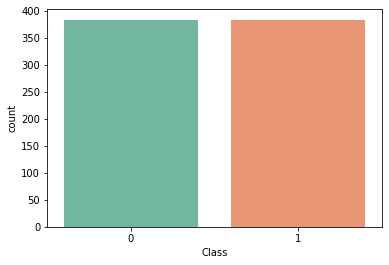

In [33]:
#cheack if data is balance
sns.countplot(x='Class', data=reasmpled_data, palette='Set2')
plt.show()

In [34]:
reasmpled_data.duplicated().sum()   #checking for duplicaes

0

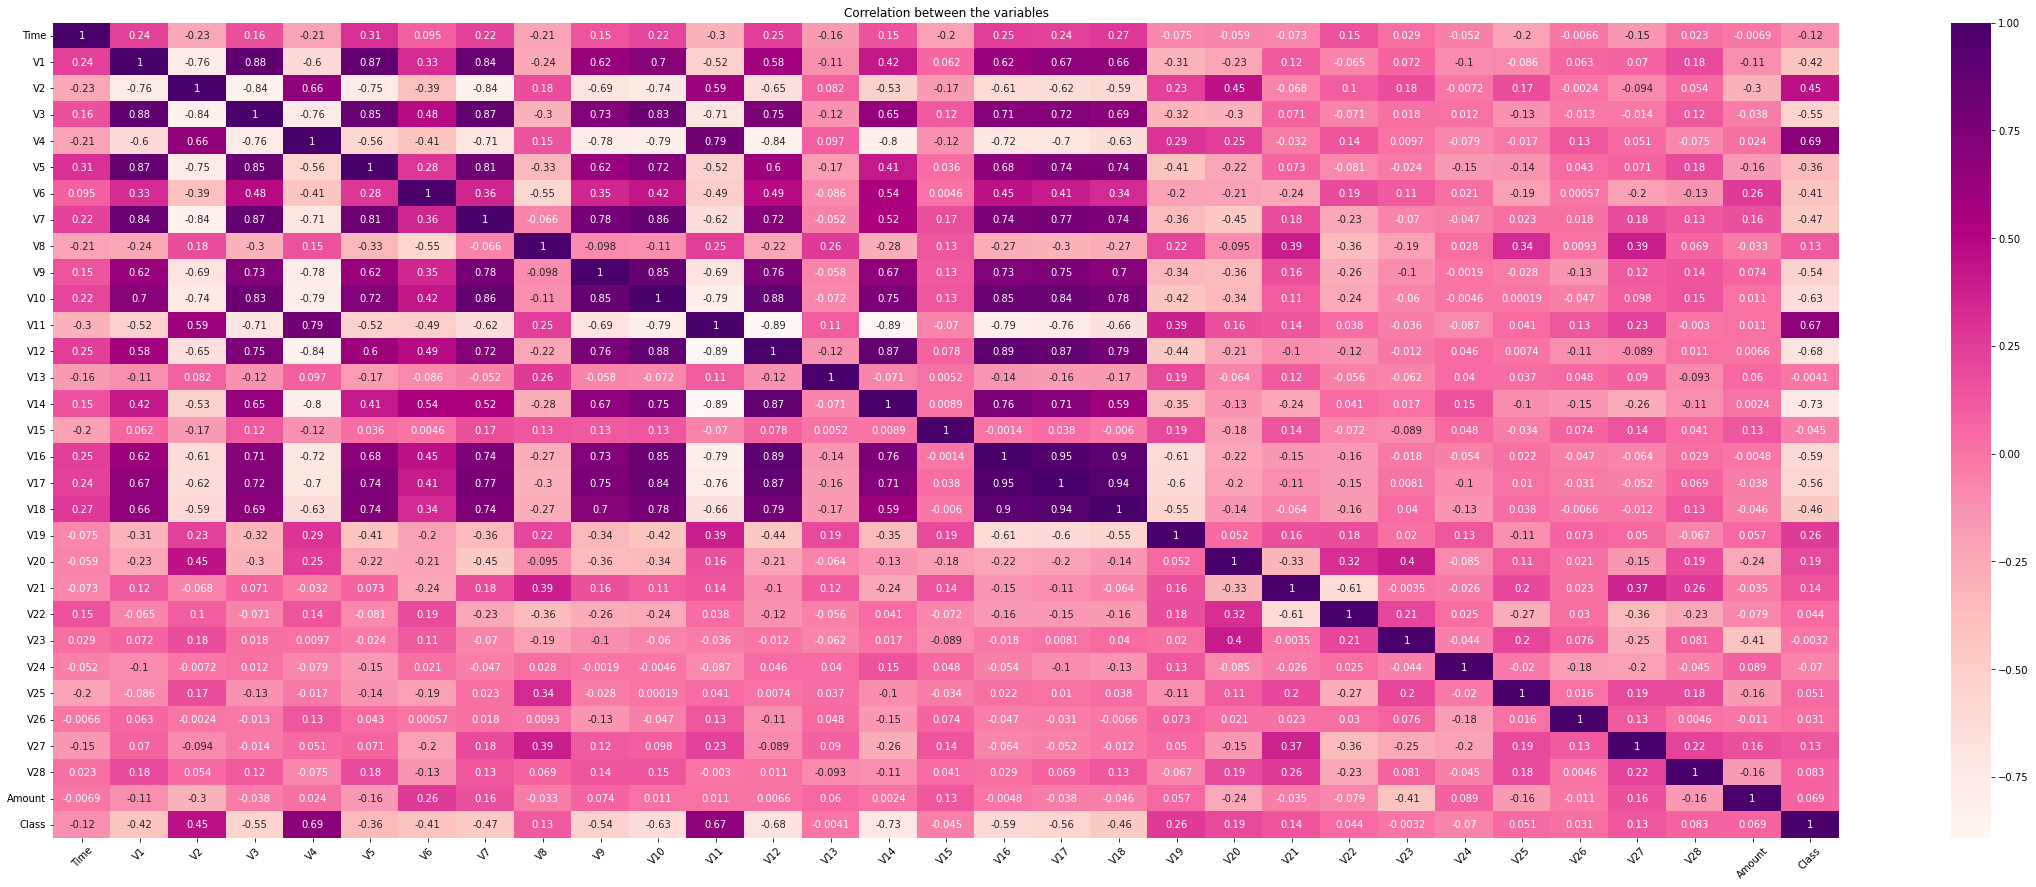

In [35]:
#heatmap for different features
fig, ax = plt.subplots(figsize=(40,15))         # Sample figsize in inches
sns.heatmap(reasmpled_data.corr(), annot = True, ax=ax, cmap="RdPu");
plt.title('Correlation between the variables')
plt.xticks(rotation=45);

###Dropping the least coorelated fatures from the list to reduce the dimensions.



In [36]:
data= reasmpled_data.drop(['V8','V13','V15','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)


In [37]:
reasmpled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38806.0,-0.267070,-3.420547,0.302714,0.138008,-2.053914,1.211614,-0.375286,0.321417,-0.150342,...,-0.040935,-1.106855,-0.442306,-0.244018,-0.452062,0.876820,-0.123455,0.132106,760.51,0
1,60297.0,-4.034565,0.270213,0.175788,0.336895,0.320120,-1.238405,0.372653,-0.094779,1.031988,...,-0.794943,-0.402417,0.767557,0.379036,0.136223,0.020358,-0.602154,0.177089,2.69,0
2,26169.0,-1.051762,0.764093,1.016036,-1.675189,0.608505,-0.321916,0.766860,-0.171875,0.623030,...,-0.297439,-0.470573,-0.242228,-0.973276,-0.066842,0.787234,0.298496,0.123145,29.74,0
3,76806.0,-2.070112,-0.945981,0.515135,1.110074,1.071241,-1.362001,-0.944967,0.510523,-0.632906,...,-0.106283,-0.769079,-0.463711,0.006992,-0.633341,0.155053,0.024792,-0.396724,0.99,0
4,121242.0,-1.426992,-0.286901,-0.727728,0.129206,1.322539,-1.696969,1.124511,-0.711191,0.585351,...,0.059918,1.122399,0.637690,-0.094891,-0.120331,-0.173842,-0.324627,0.394020,25.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,97235.0,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,...,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,9.82,1
764,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
765,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1
766,35942.0,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1


In [38]:
test_data=reasmpled_test.drop(['V8','V13','V15','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)

**Exploration for the highly corrlaeted variales**

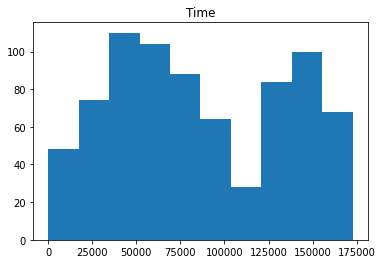

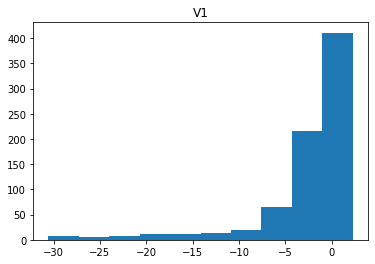

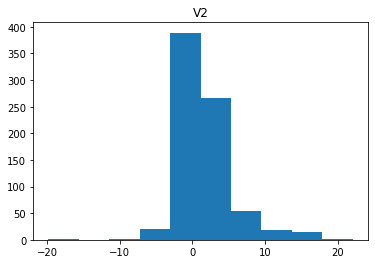

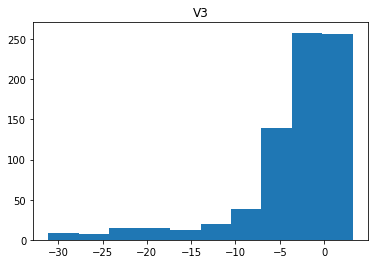

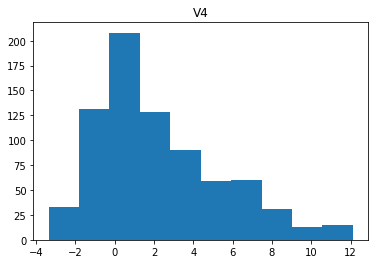

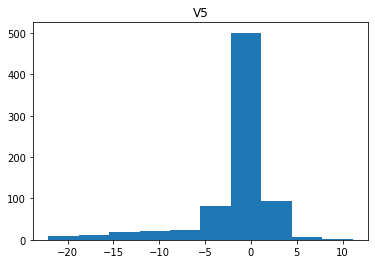

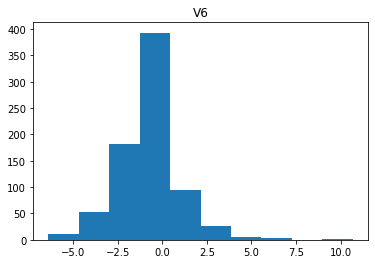

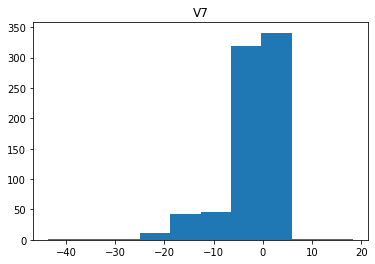

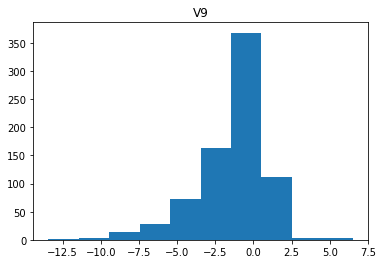

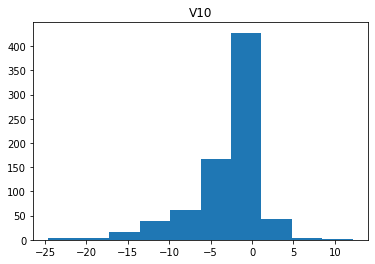

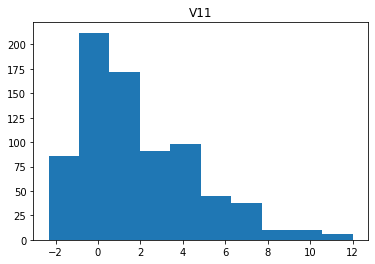

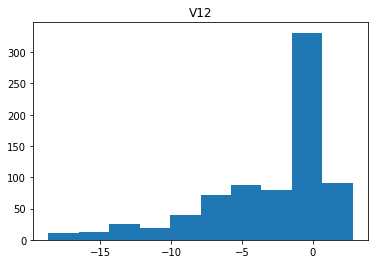

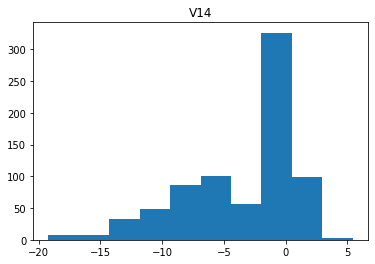

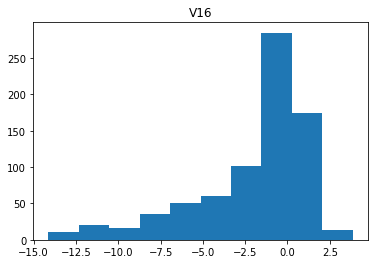

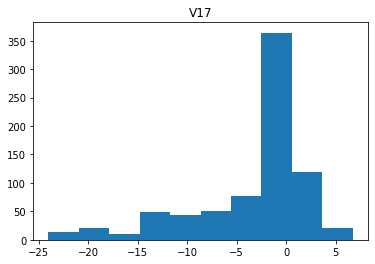

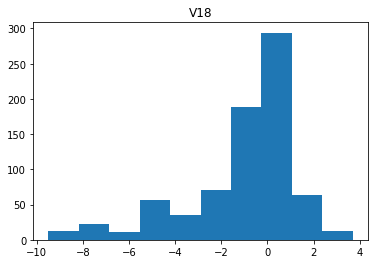

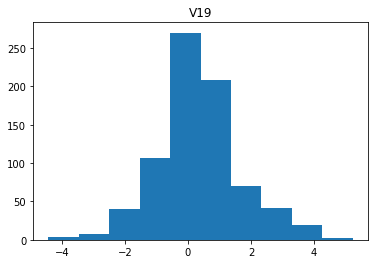

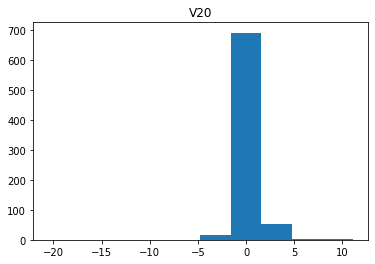

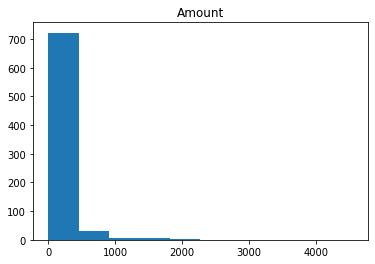

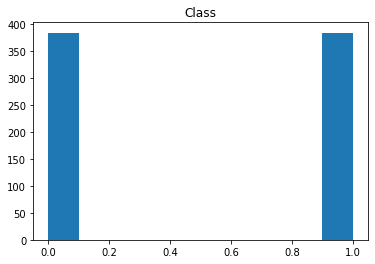

In [39]:

#plt.title('Histogram for highy cooralted variables')
data.head()

for i in data.columns:
       

   
 
    
    plt.title(f'{i}')
    plt.hist(data[i])
    plt.show()

###From he above histhrams for the features :###
**There are multiple outliers in the data **

###we will use IQR method to detect those outliers to deal with them### 

In [40]:
##functin to relace the outliers from the data with the median values
##the function will first calcualte the inter quartile range IQR=Q3-Q1
##Detect the ouliers such according to outlier-> [Q1-1.5IQR ,Q3+1.5IQR]
def remove_outliers(data:pd.DataFrame) ->int:    
    p=1.5
    col_name=data.columns 
    for i in range(len(col_name)) :
      col_list=np.array(data[col_name[i]].tolist())
      median_value= data[col_name[i]].median()
      
      
      Q1 = np.percentile(np.array(data[col_name[i]].tolist()), 25)                    ###first_quartile
      Q3 = np.percentile(np.array(data[col_name[i]].tolist()), 75)                      ###third_quartile
      IQR = Q3 - Q1
      upper_limit = Q3+(p*IQR)
      lower_limit = Q1-(p*IQR)
      row=0
      for value in (data[col_name[i]].tolist()):
         if (value < lower_limit) | (value > upper_limit):
           #print(col_list[row])
           col_list[row]=median_value

         row=row+1
      data[col_name[i]]=col_list
            
            
    return data

In [41]:
data=data.drop(['Class'],axis=1)  ##Dropping the trget clolumn

In [42]:
####testing remove oulier unction 
X_test=test_data.drop(['Class'],axis=1) 
y_test=test_data['Class']
data=remove_outliers(data)


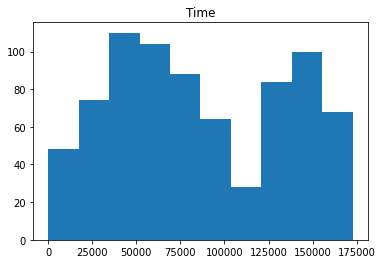

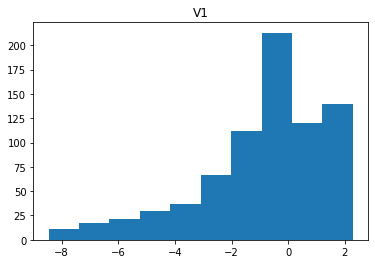

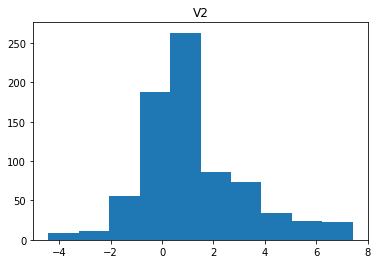

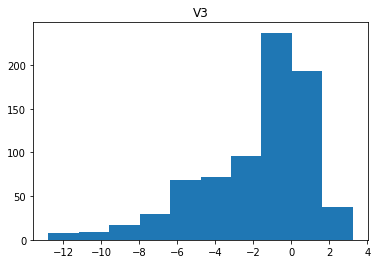

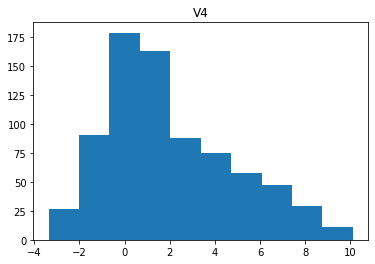

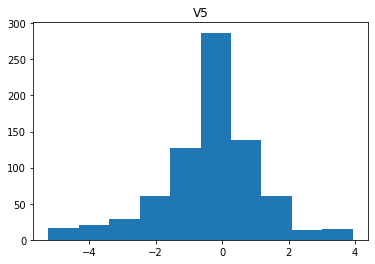

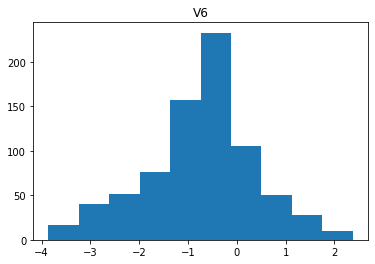

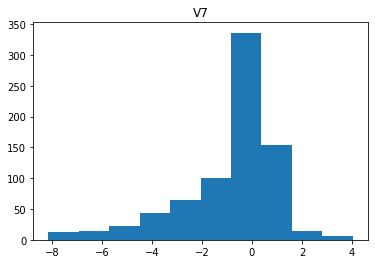

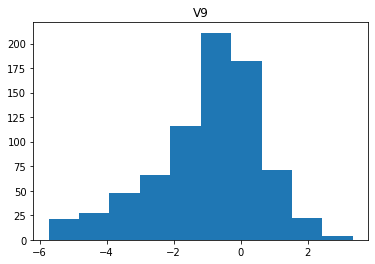

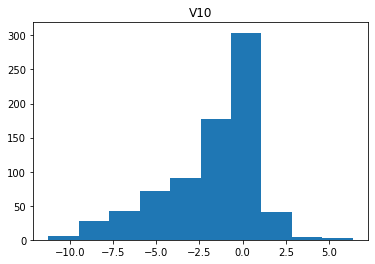

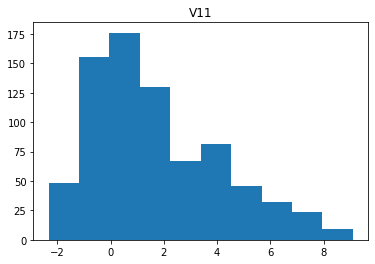

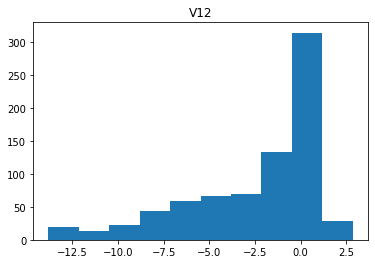

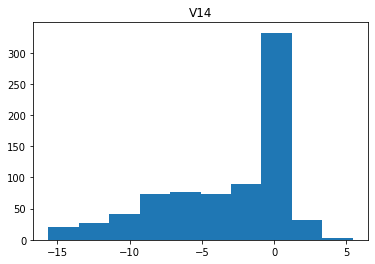

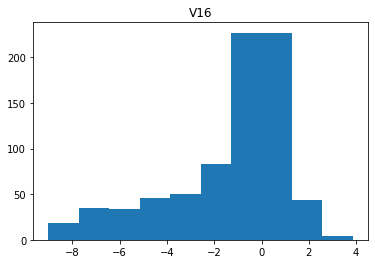

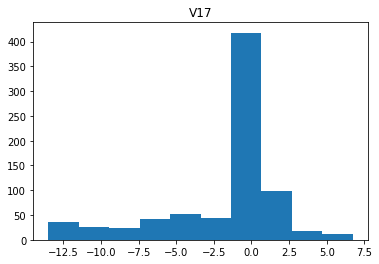

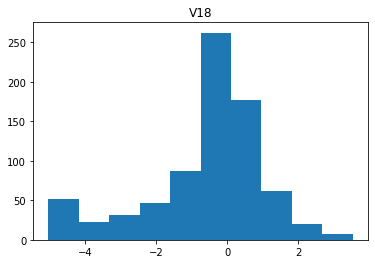

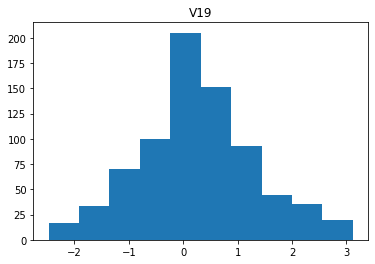

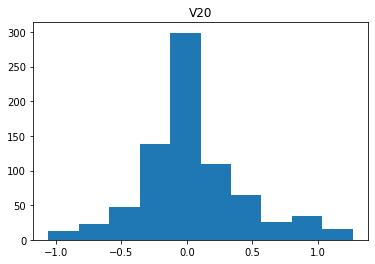

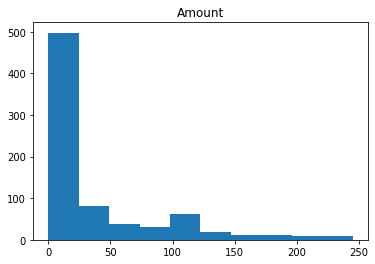

In [43]:
#plt.title('Histogram for highy cooralted variables')
data.head()

for i in data.columns:   
    plt.title(f'{i}')
    plt.hist(data[i])
    plt.show()

In [44]:
data.shape

(768, 19)

In [45]:
target=reasmpled_data['Class']

In [46]:
target

0      0
1      0
2      0
3      0
4      0
      ..
763    1
764    1
765    1
766    1
767    1
Name: Class, Length: 768, dtype: int64

In [47]:
X_train=data
y_train=target


In [48]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,Amount
0,38806.0,-0.267070,-3.420547,0.302714,0.138008,-2.053914,1.211614,-0.375286,-0.150342,0.173395,0.981732,0.718158,-0.122577,-1.843611,0.761894,0.549905,-1.034479,0.937578,18.615
1,60297.0,-4.034565,0.270213,0.175788,0.336895,0.320120,-1.238405,0.372653,1.031988,1.628385,0.554024,0.315547,-1.022540,0.050903,0.241524,-0.902007,-0.451981,-0.725559,2.690
2,26169.0,-1.051762,0.764093,1.016036,-1.675189,0.608505,-0.321916,0.766860,0.623030,0.108435,-1.589672,-0.558267,-0.491502,0.897519,-1.311786,0.047769,-0.209098,0.392032,29.740
3,76806.0,-2.070112,-0.945981,0.515135,1.110074,1.071241,-1.362001,-0.944967,-0.632906,-0.195345,1.007269,0.382841,0.363336,0.537320,0.205739,0.699948,1.302874,-0.001237,0.990
4,121242.0,-1.426992,-0.286901,-0.727728,0.129206,1.322539,-1.696969,1.124511,0.585351,-0.014295,-0.407794,-0.392983,-1.264401,0.022740,0.221279,0.659756,-0.026601,-0.467190,25.280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,97235.0,-0.799935,1.000954,-1.397046,1.329174,-0.397781,-0.381622,-0.607585,-0.785590,-0.867968,4.417055,-12.893520,-3.547230,-0.560946,-0.454241,-0.324555,2.435823,0.022190,9.820
764,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,-0.980832,-2.495619,2.555589,-3.530436,-3.455197,-2.467737,-7.140326,-1.271280,-0.001722,0.025427,19.730
765,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,-4.917130,-6.600461,3.367846,-7.888978,-7.628652,-7.533404,-0.454241,-4.960109,2.525785,0.757287,4.560
766,35942.0,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,-3.679659,-7.524368,2.954344,-7.099825,-7.687803,-8.520850,-13.277300,-0.324555,0.263021,0.579098,14.460


In [49]:
y_test

245893    0
166133    0
200032    0
25523     0
142218    0
         ..
126984    0
100717    0
154438    0
225769    0
115091    0
Name: Class, Length: 56746, dtype: int64

In [58]:
#dataframe to hold the raining and tes scores for the models
mod=["Logistic Regressin " , "DecisionTree" ,"RandomForestClassifier","KNeighborsClassifier()"]
scores = pd.DataFrame( columns = ['training_accuracy ', 'test_accuracy ' ,'recall_train', 
                              'precision_train','recall_test','precision_test'  ],index=mod)

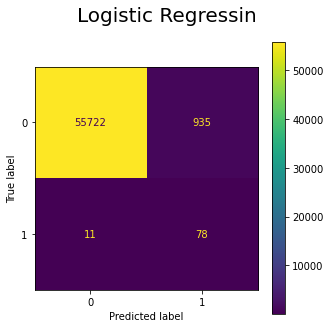

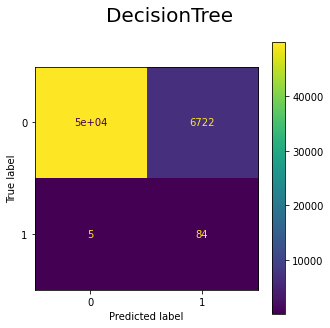

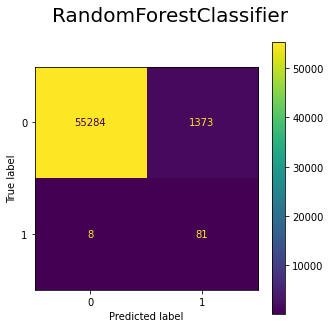

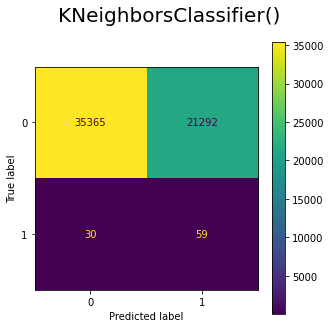

In [60]:
#Defining Modesl
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4=KNeighborsClassifier()
#clf6= LinearSVC()
i=0
models=[ clf1,clf2,clf3,clf4]
for model in models:
   model.fit(X_train, y_train)
   X_train_prediction = model.predict(X_train)
   training_data_accuracy = accuracy_score(X_train_prediction, y_train)
   training_data_recall = recall_score(X_train_prediction, y_train)
   training_data_prcision = precision_score(X_train_prediction, y_train)
   # accuracy on test data
   X_test_prediction = model.predict(X_test)
   test_data_accuracy = accuracy_score(X_test_prediction, y_test)
   test_data_recall = recall_score(X_test_prediction, y_test)
   
   test_data_prcision = precision_score(X_test_prediction, y_test)
    #
   
   cm=confusion_matrix(y_test,X_test_prediction)
   cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
   fig, ax = plt.subplots(figsize=(5,5))
   fig.suptitle(mod[i], fontsize=20)
   cm_disp.plot(ax=ax)
   #
   scores.loc[mod[i]] = [training_data_accuracy*100 , test_data_accuracy*100 , training_data_recall*100 ,
            training_data_prcision*100 ,test_data_recall*100 , test_data_prcision*100 ]
   i=i+1




In [61]:
scores

,training_accuracy,test_accuracy,recall_train,precision_train,recall_test,precision_test
Logistic Regressin,91.927083,98.332922,95.738636,87.760417,7.699901,87.640449
DecisionTree,100.0,88.14542,100.0,100.0,1.234205,94.382022
RandomForestClassifier,99.869792,97.566348,100.0,99.739583,5.570839,91.011236
KNeighborsClassifier(),73.697917,62.425545,72.864322,75.520833,0.276334,66.292135


**From the abobe results ,Decision tree classifier give the highest precision of them all**

###Best Model is DecisionTree

###Comments On the different models : ###


*   Logistic Regression : worst model ((if we just predicted it is not fraud ,we will have better accuracy).the reason is that the data can not be sparated into just to groubs.
*   Decision trees gives much more accuracy than logistic regreion since it can separate the data into more groubs





###Hyper parameter Tunning for Random forest ###

> Indented block



In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [94]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [2, 6,10,20,50,100], "max_features": ['auto', 'sqrt'], "min_samples_leaf": [1,3,4,5,6,7],"criterion": ["gini", "entropy"]}
rf_RandomGrid = RandomizedSearchCV(estimator = clf2, param_distributions = param_dist, cv = 10, verbose=2, n_jobs = 20)
mod=["Gridsearch "]
scores_gridsearch = pd.DataFrame( columns = ['training_accuracy ', 'test_accuracy ' ,'recall_train', 
                              'precision_train','recall_test','precision_test'  ],index=mod)

In [96]:
Finalscores = pd.DataFrame( columns = ['training_accuracy ', 'test_accuracy ' ,'recall_train', 
                              'precision_train','recall_test','precision_test'  ],index=mod)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


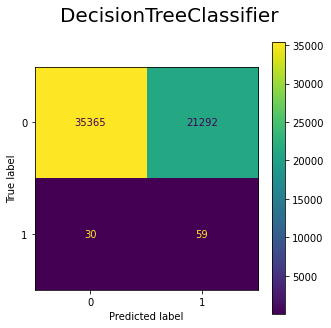

In [97]:
rf_RandomGrid.fit(X_train, y_train)
X_train_prediction = rf_RandomGrid.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_recall = recall_score(X_train_prediction, y_train)
training_data_prcision = precision_score(X_train_prediction, y_train)
   # accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
test_data_recall = recall_score(X_test_prediction, y_test)
   
test_data_prcision = precision_score(X_test_prediction, y_test)
    #
cm=confusion_matrix(y_test,X_test_prediction)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("DecisionTreeClassifier", fontsize=20)
cm_disp.plot(ax=ax)
   #
Finalscores.loc["DecisionTreeClassifier"] = [training_data_accuracy*100 , test_data_accuracy*100 , training_data_recall*100 ,
            training_data_prcision*100 ,test_data_recall*100 , test_data_prcision*100 ]

In [99]:
rf_RandomGrid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4}

In [100]:
Finalscores

,training_accuracy,test_accuracy,recall_train,precision_train,recall_test,precision_test
Gridsearch,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTreeClassifier,95.052083,62.425545,96.505376,93.489583,0.276334,66.292135
